## Import packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

## Import the dataset

In [5]:
#dataset

train = pd.read_csv('HeatingLoad_training.csv')
train.head()

,BuildingAge,BuildingHeight,Insulation,AverageTemperature,SunlightExposure,WindSpeed,OccupancyRate,HeatingLoad
0,18.56,30.36,1,13.75,453.67,3.89,0.65,275.89
1,13.82,9.64,0,18.70,138.85,0.95,0.55,208.02
2,36.47,8.44,1,18.23,190.31,4.71,0.56,234.86
3,23.23,18.71,1,21.89,313.15,8.51,0.25,243.89
4,11.62,11.95,0,19.49,117.53,1.57,0.58,205.94


## Exploratory Data Analysis (EDA)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BuildingAge         10000 non-null  float64
 1   BuildingHeight      10000 non-null  float64
 2   Insulation          10000 non-null  int64  
 3   AverageTemperature  10000 non-null  float64
 4   SunlightExposure    10000 non-null  float64
 5   WindSpeed           10000 non-null  float64
 6   OccupancyRate       10000 non-null  float64
 7   HeatingLoad         10000 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 625.1 KB


In [7]:
train.describe().round(4)

,BuildingAge,BuildingHeight,Insulation,AverageTemperature,SunlightExposure,WindSpeed,OccupancyRate,HeatingLoad
count,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
mean,22.7655,20.7921,0.5960,18.0249,271.3616,4.4907,0.5001,260.0786
std,12.3860,16.8827,0.4907,4.0907,229.2752,2.5312,0.2220,74.5919
min,2.9900,3.0700,0.0000,1.6800,1.1500,0.0700,0.0100,173.6800
25%,14.2500,9.3100,0.0000,15.2700,100.0825,2.6100,0.3300,218.0875
50%,20.0900,15.0200,1.0000,18.0200,182.4350,4.1000,0.5000,236.8000
75%,28.0925,25.8300,1.0000,20.8100,407.0900,5.9600,0.6700,270.3500
max,153.8800,106.3600,1.0000,34.3400,1250.7100,18.9100,1.0000,793.9200


There's no null value in all variables.

In [8]:
train = train.drop_duplicates()

In [9]:
train.describe().round(4)

,BuildingAge,BuildingHeight,Insulation,AverageTemperature,SunlightExposure,WindSpeed,OccupancyRate,HeatingLoad
count,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
mean,22.7655,20.7921,0.5960,18.0249,271.3616,4.4907,0.5001,260.0786
std,12.3860,16.8827,0.4907,4.0907,229.2752,2.5312,0.2220,74.5919
min,2.9900,3.0700,0.0000,1.6800,1.1500,0.0700,0.0100,173.6800
25%,14.2500,9.3100,0.0000,15.2700,100.0825,2.6100,0.3300,218.0875
50%,20.0900,15.0200,1.0000,18.0200,182.4350,4.1000,0.5000,236.8000
75%,28.0925,25.8300,1.0000,20.8100,407.0900,5.9600,0.6700,270.3500
max,153.8800,106.3600,1.0000,34.3400,1250.7100,18.9100,1.0000,793.9200


There's no duplicate data in the training dataset. 

In [10]:
train.columns

Index(['BuildingAge', 'BuildingHeight', 'Insulation', 'AverageTemperature',
       'SunlightExposure', 'WindSpeed', 'OccupancyRate', 'HeatingLoad'],
      dtype='object')

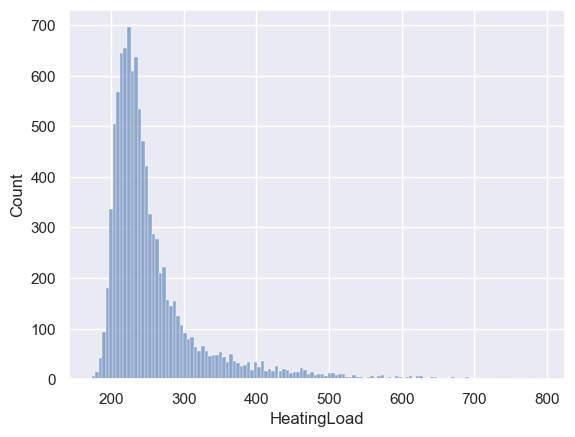

In [14]:
sns.set(font_scale=1)
sns.set_palette("vlag")
sns.histplot(train['HeatingLoad'])
plt.savefig('fig.png')

Right skew- insert value here

In [12]:
train['HeatingLoad'].value_counts().sort_values(ascending = False).head(10)

HeatingLoad
222.40    7
227.17    6
218.25    6
213.77    6
225.29    6
234.40    6
245.36    6
216.69    6
227.59    6
240.11    6
Name: count, dtype: int64

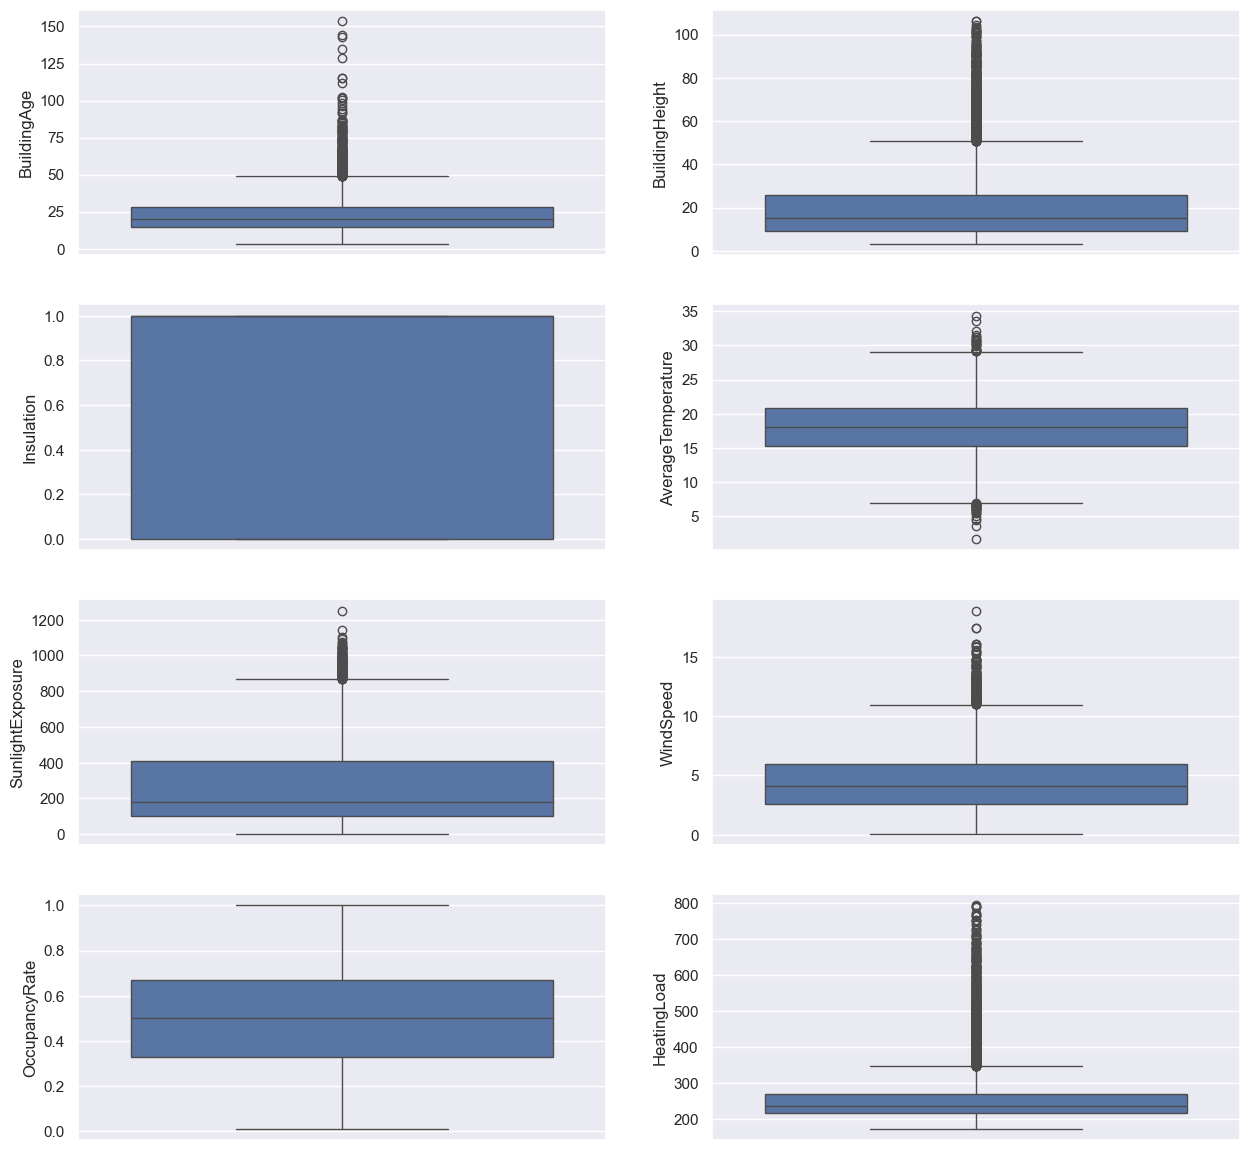

In [13]:
fig = plt.figure(figsize=(15,30))
for i in range(train.columns.shape[0]):
    ax = fig.add_subplot(8,2,i+1)
    sns.boxplot(train[train.columns[i]])

Insulation is a binary variable. For other variables, except OccupationRate, they all have a lot of outliers. I won't remove these outliers as the number of sample will drop significantly.

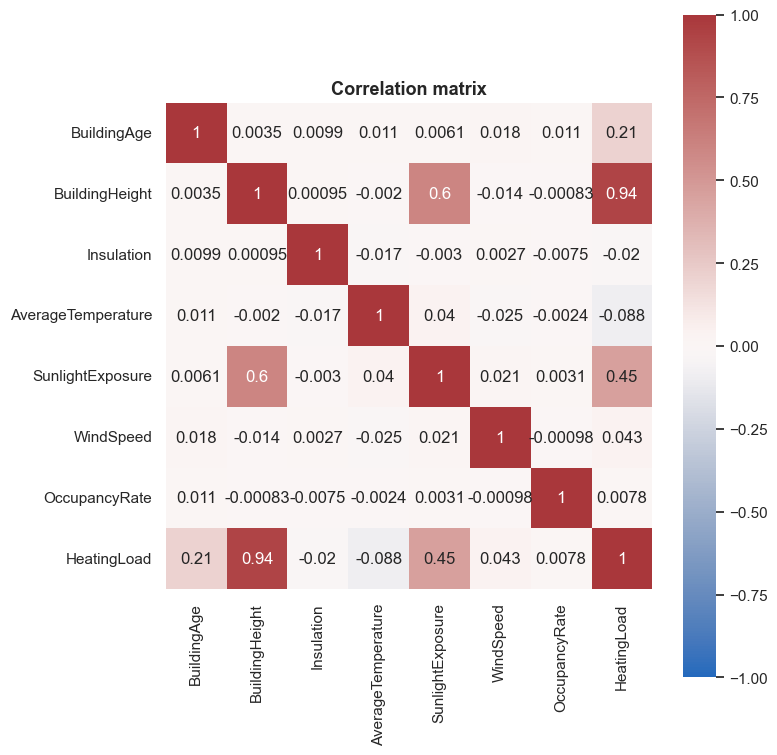

In [11]:
#correlation matrix
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()
variables=['BuildingAge', 'BuildingHeight', 'Insulation', 'AverageTemperature',
       'SunlightExposure', 'WindSpeed', 'OccupancyRate', 'HeatingLoad']
sns.heatmap(train[variables].corr(), vmax=1, vmin=-1, center=0, square=True, ax=ax, annot=True, cmap = "vlag")
ax.set_title('Correlation matrix', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show()

BuildingHeight has a high positive correlation with HeatingLoad.

SunlighExposure has a postive correlation with HeatingLoad.

For other variables, except SunlightExposure and BuildingHeight, all predictors have a low correlation with each other.

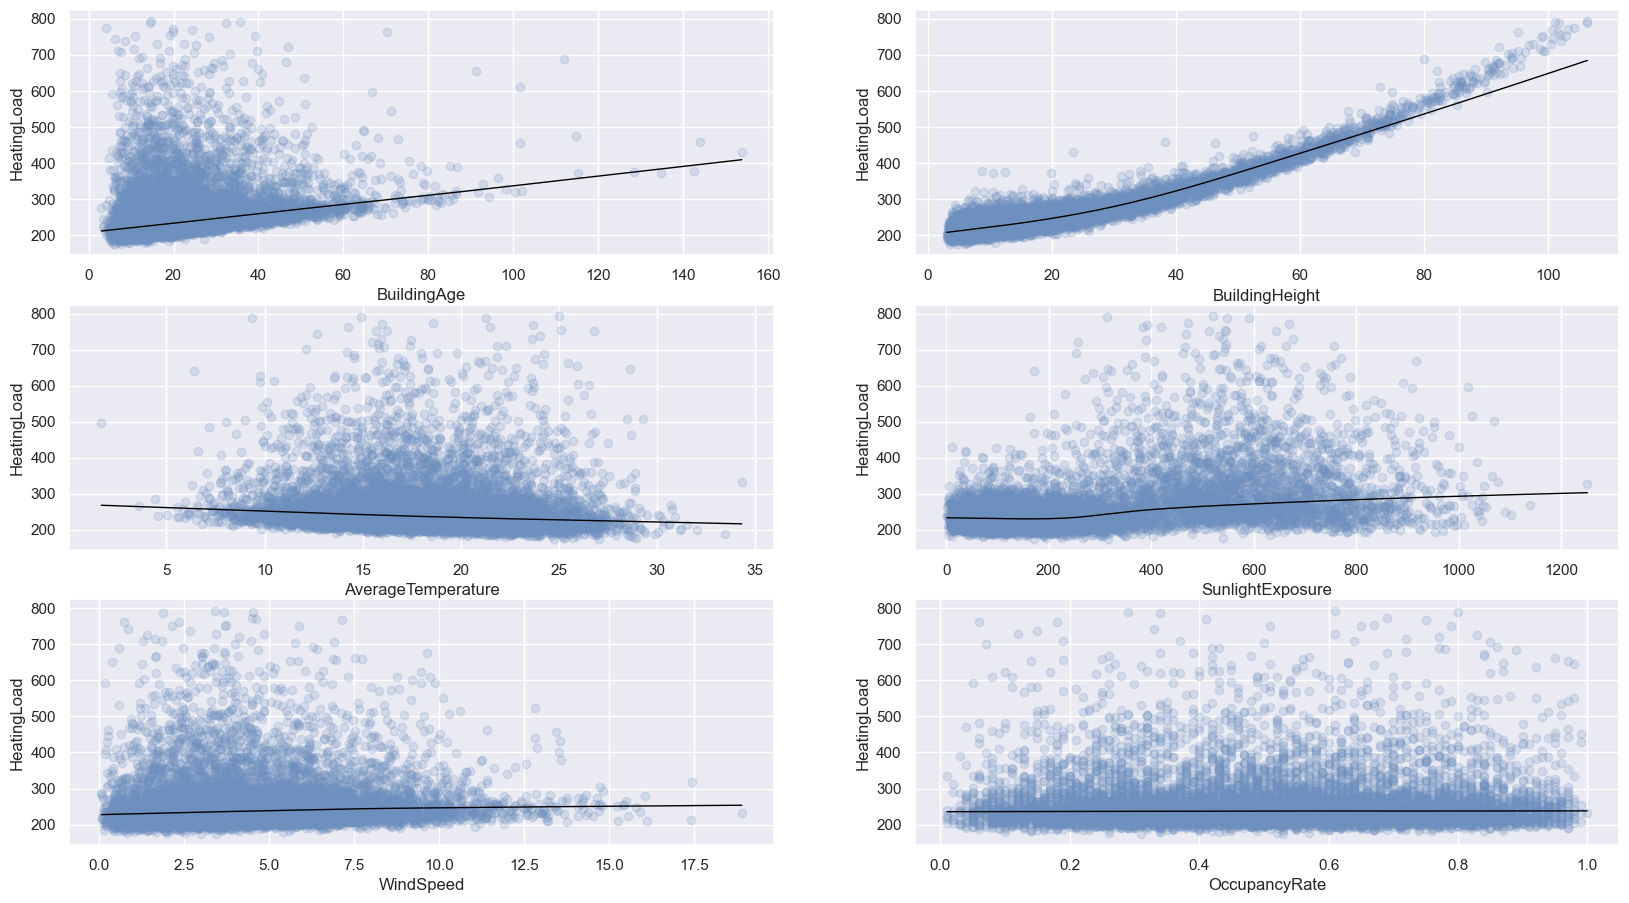

In [12]:
fig1 = plt.figure(figsize=(20,30))
var = ['BuildingAge', 'BuildingHeight', 'AverageTemperature',
       'SunlightExposure', 'WindSpeed', 'OccupancyRate']
for i in range(len(var)):
    ax = fig1.add_subplot(8,2,i+1)
    sns.regplot(x = train[var[i]], y = train['HeatingLoad'], lowess= True,scatter_kws={'alpha': 0.2}, line_kws={'color': 'black', 'linewidth': 1})

There seems to be a quadratic relationship between HeatingLoad and BuildingHeight.

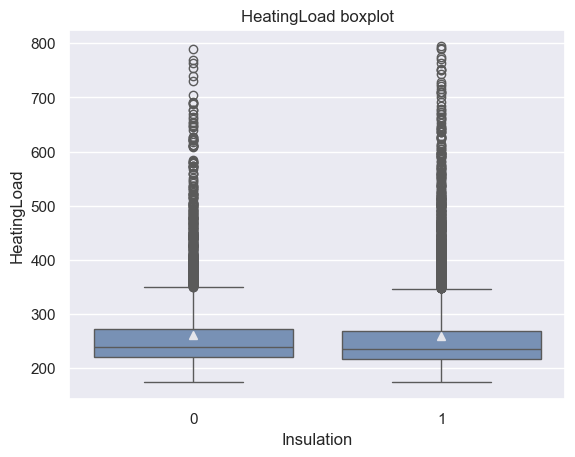

In [13]:
#plot insulation and heatingload boxplot
#pls make it prettier
sns.boxplot(y = "HeatingLoad", x = "Insulation", data= train, showmeans = True)
plt.title('HeatingLoad boxplot')
plt.savefig('fig5.png')

In [14]:
train.groupby("Insulation")['HeatingLoad'].mean()

Insulation
0    261.907342
1    258.839040
Name: HeatingLoad, dtype: float64

Text(0.5, 1.0, 'HeatingLoad distribution')

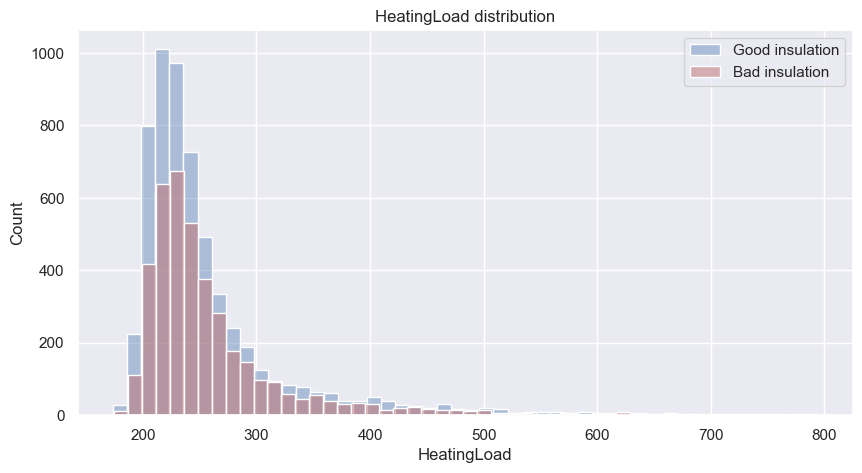

In [15]:
good = train[train['Insulation']==1]
bad = train[train['Insulation']==0]
color = sns.color_palette("vlag")
fig = plt.figure(figsize=(10,5))
sns.histplot(x = good['HeatingLoad'], label = 'Good insulation', alpha = 0.5, bins = 50)
sns.histplot(x = bad['HeatingLoad'], label = 'Bad insulation', alpha = 0.5, bins = 50, color = color[5])
plt.legend()
plt.title('HeatingLoad distribution')

## Building prediciton model

I will build predictive models and evaluate all these models based on forward-stepwise selection. Then I will use cross-validation for model selection.

In [16]:
def forward_selected(data, response, nominated = []):
    remaining = set(data.columns)
    selected = nominated
    remaining.remove(response)
    remaining ^= set(selected)
    current_score, best_new_score = 0.0, 0.0
    if nominated:
        formula = "{} ~ {} + 1".format(response, ' + '.join(nominated))
        current_score= smf.ols(formula, data).fit().rsquared_adj
        best_new_score = current_score
        print("you nominated variable(s) %s, the adj_r2 is: %f" %(nominated, current_score))
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            print("adding %s increases adj_r2 from %f to %f" %(best_candidate, current_score, best_new_score))
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    print("final model is %s, with adj_r2 of %f" %(formula, model.rsquared_adj))
    return model

In [17]:
#cross-validation- rmse
def cv_rmse(predictors):
    lr = LinearRegression()
    score = cross_val_score(lr,train[predictors], train['HeatingLoad'], cv = 10, scoring = 'neg_mean_squared_error')
    rmse = np.sqrt(-1*score.mean()).round(4)
    return rmse

In [18]:
#cross-validation- mae
def cv_mae(predictors):
    lr = LinearRegression()
    score = cross_val_score(lr,train[predictors], train['HeatingLoad'], cv = 10, scoring = 'neg_mean_absolute_error')
    mae = (-1*score).mean().round(4)
    return mae

In [19]:
#cross-validation- r2
def cv_r2(predictors):
    lr = LinearRegression()
    score = cross_val_score(lr,train[predictors], train['HeatingLoad'], cv = 10, scoring = 'r2')
    r2 = score.mean().round(4)
    return r2

**Model 1: Using all the variables**

In [20]:
train.columns

Index(['BuildingAge', 'BuildingHeight', 'Insulation', 'AverageTemperature',
       'SunlightExposure', 'WindSpeed', 'OccupancyRate', 'HeatingLoad'],
      dtype='object')

In [21]:
forward_selected(train[['BuildingAge', 'BuildingHeight', 'Insulation', 'AverageTemperature',
       'SunlightExposure', 'WindSpeed', 'OccupancyRate', 'HeatingLoad']],'HeatingLoad')

adding BuildingHeight increases adj_r2 from 0.000000 to 0.878425
adding BuildingAge increases adj_r2 from 0.878425 to 0.920197
adding SunlightExposure increases adj_r2 from 0.920197 to 0.938161
adding AverageTemperature increases adj_r2 from 0.938161 to 0.944783
adding WindSpeed increases adj_r2 from 0.944783 to 0.947806
adding Insulation increases adj_r2 from 0.947806 to 0.948435
adding OccupancyRate increases adj_r2 from 0.948435 to 0.948472
final model is HeatingLoad ~ BuildingHeight + BuildingAge + SunlightExposure + AverageTemperature + WindSpeed + Insulation + OccupancyRate + 1, with adj_r2 of 0.948472


In [22]:
variables1 =['BuildingAge', 'BuildingHeight', 'Insulation', 'AverageTemperature','SunlightExposure', 'WindSpeed', 'OccupancyRate']
# model1 = smf.ols(formula = 'HeatingLoad ~ BuildingAge + BuildingHeight + Insulation + AverageTemperature + SunlightExposure + WindSpeed + OccupancyRate', data = train).fit()
# model1.summary()

In [23]:
cv_rmse(variables1)

16.9509

In [24]:
cv_mae(variables1)

12.1025

In [25]:
cv_r2(variables1)

0.9483

**Model 2: HeatingLoad with BuildingHeight, SunlightExposure and BuildingAge (highest correlation)**

In [26]:
variables2 = ['BuildingHeight','SunlightExposure','BuildingAge']
# model2 = smf.ols(formula = 'HeatingLoad ~ BuildingHeight + SunlightExposure + BuildingAge', data = train).fit()
# model2.summary()

In [27]:
cv_rmse(variables2)

18.5615

In [28]:
cv_mae(variables2)

13.491

In [29]:
cv_r2(variables2)

0.9379

**Model 3: HeatlingLoad with BuildingHeight (polynomial)**

In [30]:
max_deg = 10

cv_scores_lr = []

for i in range(1, max_deg):
    
    poly_transformer = PolynomialFeatures(i) 
    poly_x = poly_transformer.fit_transform(train['BuildingHeight'].to_numpy().reshape(-1,1))
    
    # Create the linear regression object
    lin_reg = LinearRegression()
    
    # use 3-fold cv
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
    scores_lr = cross_val_score(lin_reg, poly_x, train['HeatingLoad'], cv=10, scoring = 'neg_mean_squared_error')

    # Get the mean of the scores from the 3 folds
    cv_score = np.sqrt(-1*np.mean(scores_lr)).round(4)
    
    cv_scores_lr.append(cv_score)
cv_scores_lr

[26.0168, 18.4683, 18.468, 18.4592, 18.4602, 18.4586, 18.4605, 18.4645, 18.501]

In [31]:
1 + np.argmin(cv_scores_lr)

6

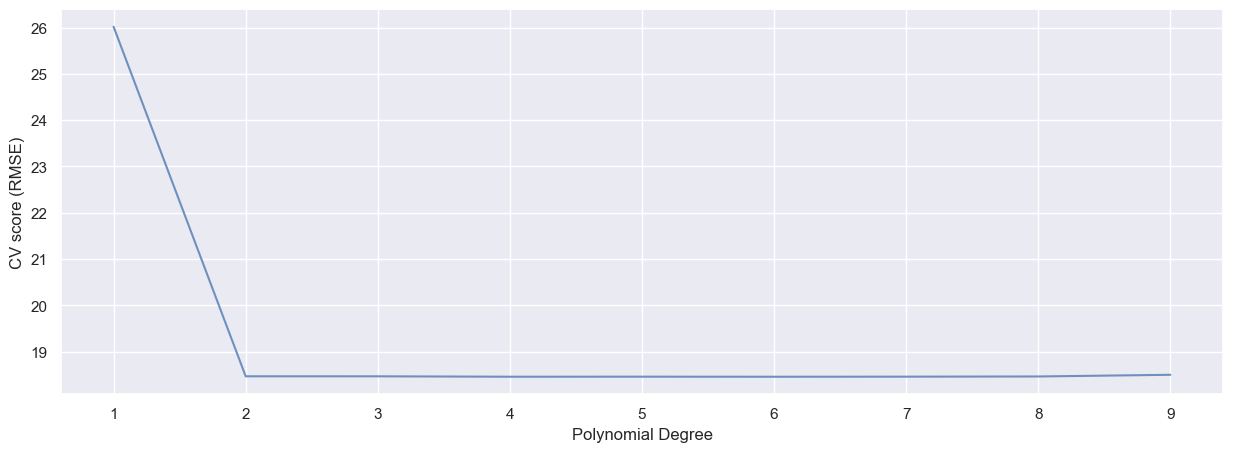

In [32]:
fig = plt.figure(figsize=(15,5))

plt.plot(np.arange(1,max_deg), cv_scores_lr)

plt.xlabel("Polynomial Degree")
plt.ylabel("CV score (RMSE)")
plt.savefig('fig6.png')
plt.show()

In [33]:
((18.4683-18.4586)/18.4586)*100

0.05255003087990806

In [34]:
train['BuildingHeight_square'] = train['BuildingHeight']**2

In [35]:
variables3=['BuildingHeight','BuildingHeight_square']
# model3 = smf.ols(formula = 'HeatingLoad ~ BuildingHeight + BuildingHeight_square', data = train).fit()
# model3.summary()

In [36]:
cv_rmse(variables3)

18.4683

In [37]:
cv_mae(variables3)

13.8532

In [38]:
cv_r2(variables3)

0.9379

**Model 4: Use forward-stepwise selection for all variable**

In [39]:
forward_selected(train[['BuildingAge','BuildingHeight', 'Insulation', 'AverageTemperature',
       'SunlightExposure', 'WindSpeed', 'OccupancyRate', 'HeatingLoad',
       'BuildingHeight_square']],"HeatingLoad")

you nominated variable(s) ['BuildingHeight', 'BuildingAge', 'SunlightExposure', 'AverageTemperature', 'WindSpeed', 'Insulation', 'OccupancyRate'], the adj_r2 is: 0.948472
adding BuildingHeight_square increases adj_r2 from 0.948472 to 0.998930
final model is HeatingLoad ~ BuildingHeight + BuildingAge + SunlightExposure + AverageTemperature + WindSpeed + Insulation + OccupancyRate + BuildingHeight_square + 1, with adj_r2 of 0.998930


In [40]:
variables4 = ['BuildingHeight','BuildingHeight_square','BuildingAge', 'AverageTemperature', 'WindSpeed','SunlightExposure','Insulation','OccupancyRate']
# model4 = smf.ols(formula = 'HeatingLoad ~ BuildingHeight + BuildingAge + SunlightExposure + AverageTemperature + WindSpeed + Insulation + OccupancyRate + BuildingHeight_square', data = train).fit()
# model4.summary()

In [41]:
cv_rmse(variables4)

2.4416

In [42]:
cv_mae(variables4)

1.9084

In [43]:
cv_r2(variables4)

0.9989

**Model 5: Interaction term between BuildingHeight and SunlightExposure**

In [44]:
train['BH_SE'] = train['BuildingHeight']*train['SunlightExposure']

In [45]:
train.columns

Index(['BuildingAge', 'BuildingHeight', 'Insulation', 'AverageTemperature',
       'SunlightExposure', 'WindSpeed', 'OccupancyRate', 'HeatingLoad',
       'BuildingHeight_square', 'BH_SE'],
      dtype='object')

In [46]:
forward_selected(train[['BuildingHeight','BuildingAge', 'Insulation', 'AverageTemperature',
       'SunlightExposure', 'WindSpeed', 'OccupancyRate', 'HeatingLoad',
       'BuildingHeight_square', 'BH_SE']],"HeatingLoad")

you nominated variable(s) ['BuildingHeight', 'BuildingAge', 'SunlightExposure', 'AverageTemperature', 'WindSpeed', 'Insulation', 'OccupancyRate', 'BuildingHeight_square'], the adj_r2 is: 0.998930
adding BH_SE increases adj_r2 from 0.998930 to 0.999214
final model is HeatingLoad ~ BuildingHeight + BuildingAge + SunlightExposure + AverageTemperature + WindSpeed + Insulation + OccupancyRate + BuildingHeight_square + BH_SE + 1, with adj_r2 of 0.999214


In [47]:
variables5 = ['BuildingHeight','BuildingAge', 'Insulation', 'AverageTemperature',
       'SunlightExposure', 'WindSpeed', 'OccupancyRate',
       'BuildingHeight_square', 'BH_SE']
# model5 = smf.ols(formula = "HeatingLoad ~ BuildingHeight + BuildingAge + SunlightExposure + AverageTemperature + WindSpeed + Insulation + OccupancyRate + BuildingHeight_square + BH_SE", data = train).fit()
# model5.summary()

In [48]:
cv_rmse(variables5)

2.0929

In [49]:
cv_mae(variables5)

1.6731

In [50]:
cv_r2(variables5)

0.9992

**Model 6: add interaction terms BuildingHeight\*WindSpeed**

In [51]:
train['BH_WS'] = train['WindSpeed']*train['BuildingHeight']

In [52]:
train.columns

Index(['BuildingAge', 'BuildingHeight', 'Insulation', 'AverageTemperature',
       'SunlightExposure', 'WindSpeed', 'OccupancyRate', 'HeatingLoad',
       'BuildingHeight_square', 'BH_SE', 'BH_WS'],
      dtype='object')

In [53]:
forward_selected(train[['BuildingHeight','BuildingAge', 'Insulation', 'AverageTemperature',
       'SunlightExposure', 'WindSpeed', 'OccupancyRate', 'HeatingLoad',
       'BuildingHeight_square','BH_SE', 'BH_WS']], "HeatingLoad")

you nominated variable(s) ['BuildingHeight', 'BuildingAge', 'SunlightExposure', 'AverageTemperature', 'WindSpeed', 'Insulation', 'OccupancyRate', 'BuildingHeight_square', 'BH_SE'], the adj_r2 is: 0.999214
adding BH_WS increases adj_r2 from 0.999214 to 0.999217
final model is HeatingLoad ~ BuildingHeight + BuildingAge + SunlightExposure + AverageTemperature + WindSpeed + Insulation + OccupancyRate + BuildingHeight_square + BH_SE + BH_WS + 1, with adj_r2 of 0.999217


In [54]:
variables6 = ['BuildingHeight','BuildingAge','Insulation','AverageTemperature','SunlightExposure','WindSpeed','OccupancyRate','BuildingHeight_square','BH_WS','BH_SE']
# model6 = smf.ols(formula = 'HeatingLoad ~ BuildingAge + Insulation + AverageTemperature + SunlightExposure + WindSpeed + OccupancyRate + BuildingHeight_square + BuildingHeight + BH_SE + BH_WS', data = train).fit()
# model6.summary()

In [55]:
cv_rmse(variables6)

2.0893

In [56]:
cv_mae(variables6)

1.6701

In [57]:
cv_r2(variables6)

0.9992

**Model 7: interaction between OccupancyRate and BuildingAge**

In [58]:
train['OR_BA'] = train['OccupancyRate']*train['BuildingAge']

In [59]:
train.columns

Index(['BuildingAge', 'BuildingHeight', 'Insulation', 'AverageTemperature',
       'SunlightExposure', 'WindSpeed', 'OccupancyRate', 'HeatingLoad',
       'BuildingHeight_square', 'BH_SE', 'BH_WS', 'OR_BA'],
      dtype='object')

In [60]:
forward_selected(train[['BuildingAge', 'BuildingHeight', 'Insulation', 'AverageTemperature',
       'SunlightExposure', 'WindSpeed', 'OccupancyRate', 'HeatingLoad',
       'BuildingHeight_square', 'BH_SE', 'BH_WS', 'OR_BA']],'HeatingLoad')

you nominated variable(s) ['BuildingHeight', 'BuildingAge', 'SunlightExposure', 'AverageTemperature', 'WindSpeed', 'Insulation', 'OccupancyRate', 'BuildingHeight_square', 'BH_SE', 'BH_WS'], the adj_r2 is: 0.999217
adding OR_BA increases adj_r2 from 0.999217 to 0.999217
final model is HeatingLoad ~ BuildingHeight + BuildingAge + SunlightExposure + AverageTemperature + WindSpeed + Insulation + OccupancyRate + BuildingHeight_square + BH_SE + BH_WS + OR_BA + 1, with adj_r2 of 0.999217


In [61]:
variables7 = ['BuildingHeight','BuildingAge','SunlightExposure','AverageTemperature','WindSpeed','Insulation','OccupancyRate','BuildingHeight_square','BH_SE','BH_WS','OR_BA']
model7 = smf.ols(formula = 'HeatingLoad ~ BuildingHeight + BuildingAge + SunlightExposure + AverageTemperature + WindSpeed + Insulation + OccupancyRate + BuildingHeight_square + BH_SE + BH_WS + OR_BA', data = train).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.160e+06
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:22:32   Log-Likelihood:                -21543.
No. Observations:               10000   AIC:                         4.311e+04
Df Residuals:                    9988   BIC:                         4.320e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               201.5803      0.165   1224.390      0.000     201.258     201.903
BuildingHeight            1.4256      0.005    290.509      0.000       1.416       1.435
BuildingAge               1.2555      0.004    304.065      0.000       1.247       1.264
SunlightExposure         -0.0169      0.000    -73.819      0.000      -0.017      -0.016
AverageTemperature       -1.5570      0.005   -304.411      0.000      -1.567      -1.547
WindSpeed                 1.6009      0.013    120.913      0.000       1.575       1.627
Insulation               -4.3336      0.043   -101.811      0.000      -4.417      -4.250
OccupancyRate             1.1437      0.193      5.935      0.000       0.766       1.521
BuildingHeight_square     0.0431   6.11e-05    704.493      0.000       0.043       0.043
BH_SE                    -0.0005    7.5e-06    -60.477      0.000      -0.000      -0.000
BH_WS                     0.0031      0.001      6.076      0.000       0.002       0.004
OR_BA                     0.0154      0.007      2.094      0.036       0.001       0.030
==============================================================================
Omnibus:                        0.669   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.716   Jarque-Bera (JB):                0.700
Skew:                           0.014   Prob(JB):                        0.705
Kurtosis:                       2.970   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
cv_rmse(variables7)

2.0892

In [63]:
cv_mae(variables7)

1.6704

In [64]:
cv_r2(variables7)

0.9992

**Model 8:KNN model**

It takes a long time for all the KNN models to run (average 3 minutes per model). Therefore, I only keep the best KNN model code. For the other models, I will show them as commnents so the code won't run.

In [65]:
def knn_one(predictor):
    neighbours=np.arange(1, 101)
    cv_rmse = []
    for k in neighbours: 
        knn = KNeighborsRegressor(n_neighbors= k) 
        scores = cross_val_score(knn, train[[predictor]], train['HeatingLoad'], cv=10, scoring = 'neg_mean_squared_error')
        # taking the average MSE across folds, then taking the square root to generate RMSE
        rmse = np.sqrt(-1*np.mean(scores)) 
        cv_rmse.append(rmse)
        knn.fit(train[[predictor]], train['HeatingLoad'])
        knn_optimal = 1 + np.argmin(cv_rmse)
        rmse_min = np.min(cv_rmse)
    return knn_optimal,rmse_min

In [66]:
def knn_multiple(predictors):
    neighbours=np.arange(1, 101)
    cv_rmse = []
    for k in neighbours: 
        knn = KNeighborsRegressor(n_neighbors = k, metric='mahalanobis', metric_params={'V': train[predictors].cov()}) 
        scores = cross_val_score(knn, train[predictors], train['HeatingLoad'], cv=10, scoring = 'neg_mean_squared_error')
        rmse = np.sqrt(-1*np.mean(scores)) # taking the average MSE across folds, then taking the square root
        cv_rmse.append(rmse)
        knn.fit(train[predictors], train['HeatingLoad'])
        knn_optimal = 1 + np.argmin(cv_rmse)
        rmse_min = np.min(cv_rmse)
    return knn_optimal,rmse_min

In [67]:
# knn_one("BuildingHeight")

In [68]:
# knn_one("BuildingAge")
# knn_one("AverageTemperature")
# knn_one("SunlightExposure")
# knn_one("WindSpeed")
# knn_one("OccupancyRate")
# knn_one("Insulation")

With the same model complexity, the KNN model with the variable "BuildingHeight" has the lowest RMSE.

In [69]:
# knn_multiple(["BuildingHeight","BuildingAge"])

In [70]:
# knn_multiple(["BuildingHeight","AverageTemperature"])
# knn_multiple(["BuildingHeight","SunlightExposure"])
# knn_multiple(["BuildingHeight","WindSpeed"])
# knn_multiple(["BuildingHeight","OccupancyRate"])
# knn_multiple(["BuildingHeight","Insulation"])

With the same model complexity, the KNN model with the variables "BuildingHeight" and "BuildingAge".

In [71]:
# knn_multiple(['BuildingHeight','BuildingAge','AverageTemperature'])

In [72]:
# knn_multiple(['BuildingHeight','BuildingAge','SunlightExposure'])
# knn_multiple(['BuildingHeight','BuildingAge','WindSpeed'])
# knn_multiple(['BuildingHeight','BuildingAge','OccupancyRate'])
# knn_multiple(['BuildingHeight','BuildingAge','Insulation'])

With the same model complexity, the KNN model with the variables "BuildingHeight", "BuildingAge", and "AverageTemperature".

In [73]:
knn_multiple(['BuildingHeight','BuildingAge','AverageTemperature','SunlightExposure'])

(5, 9.849566796301247)

In [74]:
knn = KNeighborsRegressor(n_neighbors = 5, metric='mahalanobis', metric_params={'V': train[['BuildingHeight','BuildingAge','AverageTemperature','SunlightExposure']].cov()}) 
scores = cross_val_score(knn, train[['BuildingHeight','BuildingAge','AverageTemperature','SunlightExposure']], train['HeatingLoad'], cv=10, scoring = 'neg_mean_absolute_error')
mae = (-1*np.mean(scores))
mae.round(4)

6.4763

In [75]:
scores = cross_val_score(knn, train[['BuildingHeight','BuildingAge','AverageTemperature','SunlightExposure']], train['HeatingLoad'], cv=10, scoring = 'r2')
r2 = np.mean(scores)
r2.round(4)

0.9824

In [76]:
# knn_multiple(['BuildingHeight','BuildingAge','AverageTemperature','WindSpeed'])
# knn_multiple(['BuildingHeight','BuildingAge','AverageTemperature','OccupancyRate'])
# knn_multiple(['BuildingHeight','BuildingAge','AverageTemperature','Insulation'])

With the same model complexity, the KNN model with the variables "BuildingHeight", "BuildingAge","AverageTemperature", and "SunlightExposure".

In [77]:
# knn_multiple(['BuildingHeight','BuildingAge','AverageTemperature','SunlightExposure','WindSpeed'])

In [78]:
# knn_multiple(['BuildingHeight','BuildingAge','AverageTemperature','SunlightExposure','OccupancyRate'])
# knn_multiple(['BuildingHeight','BuildingAge','AverageTemperature','SunlightExposure','Insulation'])

With the same model complexity, the KNN model with the variables "BuildingHeight", "BuildingAge","AverageTemperature", "SunlightExposure" and "Windspeed".

In [79]:
# knn_multiple(['BuildingHeight','BuildingAge','AverageTemperature','SunlightExposure','WindSpeed','OccupancyRate'])

In [80]:
# knn_multiple(['BuildingHeight','BuildingAge','AverageTemperature','SunlightExposure','WindSpeed','Insulation'])

With the same model complexity, the KNN model with the variables "BuildingHeight", "BuildingAge","AverageTemperature", "SunlightExposure","Windspeed" and "Insulation".

In [81]:
# knn_multiple(['BuildingHeight','BuildingAge','AverageTemperature','SunlightExposure','WindSpeed','Insulation','OccupancyRate'])

Comparing all these KNN models, the model with 'BuildingHeight','BuildingAge' and 'AverageTemperature' gives the lowest RMSE.

## Test data

In [82]:
test = pd.read_csv('HeatingLoad_test_without_HL.csv')

In [83]:
test['BuildingHeight_square'] = test['BuildingHeight']**2
test['BH_SE'] = test['BuildingHeight']*test['SunlightExposure']
test['BH_WS'] = test['BuildingHeight']*test['WindSpeed']
test['OR_BA'] = test['OccupancyRate']*test['BuildingAge']
test

,BuildingAge,BuildingHeight,Insulation,AverageTemperature,SunlightExposure,WindSpeed,OccupancyRate,BuildingHeight_square,BH_SE,BH_WS,OR_BA
0,28.15,9.74,0,14.97,359.43,3.53,0.42,94.8676,3500.8482,34.3822,11.8230
1,20.36,8.40,1,24.49,16.08,3.05,0.73,70.5600,135.0720,25.6200,14.8628
2,9.84,43.98,0,18.05,406.94,3.61,0.42,1934.2404,17897.2212,158.7678,4.1328
3,22.90,16.08,0,13.25,204.26,0.87,0.76,258.5664,3284.5008,13.9896,17.4040
4,7.35,9.83,0,20.77,285.73,3.11,0.14,96.6289,2808.7259,30.5713,1.0290
...,...,...,...,...,...,...,...,...,...,...,...
4939,16.02,6.02,1,22.76,101.27,6.21,0.45,36.2404,609.6454,37.3842,7.2090
4940,42.16,23.80,0,20.50,565.90,3.67,0.35,566.4400,13468.4200,87.3460,14.7560
4941,19.84,29.77,1,16.83,173.85,3.95,0.64,886.2529,5175.5145,117.5915,12.6976
4942,48.57,12.72,1,11.10,754.36,5.67,0.56,161.7984,9595.4592,72.1224,27.1992


In [84]:
predict = model7.predict(test)
predict

0       230.343519
1       205.384532
2       323.653650
3       241.391304
4       195.791760
           ...    
4939    200.761161
4940    272.018700
4941    278.893340
4942    259.305658
4943    299.153120
Length: 4944, dtype: float64

In [85]:
predict_data = pd.DataFrame(predict, columns = ['HeatingLoad'])
predict_data.to_csv('520603660_Assignment1_HL_prediction.csv')

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
HeatingLoad_test = pd.read_csv ("HeatingLoad_test.csv")
test_error = mean_squared_error(HeatingLoad_test['HeatingLoad'],predict)
print(test_error)